(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

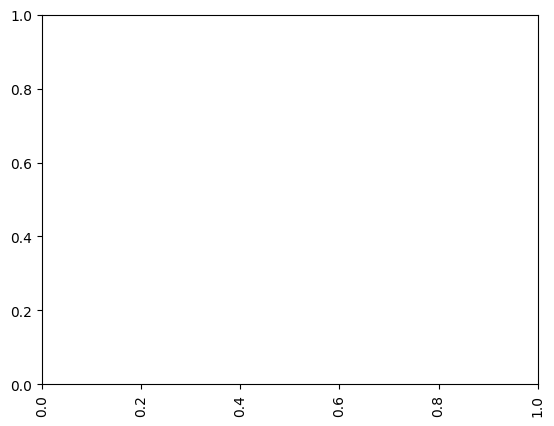

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

plt.xticks(rotation='vertical')

In [9]:
train_df=pd.read_csv("/content/drive/MyDrive/Examen/train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/Examen/test.csv")

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
print('__Test_DataSet_')
test_df.head()

__Test_DataSet_


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
def missingdata(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)

    plt.figure(figsize=(10, 6))
    missing.plot.bar()
    plt.title('Missing Data by Feature')
    plt.xlabel('Features')
    plt.ylabel('Number of missing values')
    plt.xticks(rotation=90)  # Ensure this is set to a valid value
    plt.show()

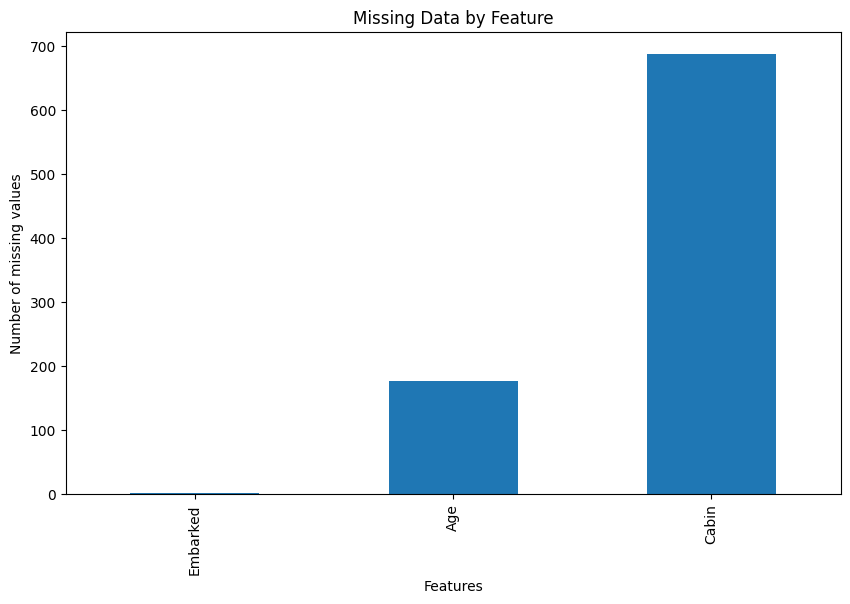

In [15]:
missingdata(train_df)

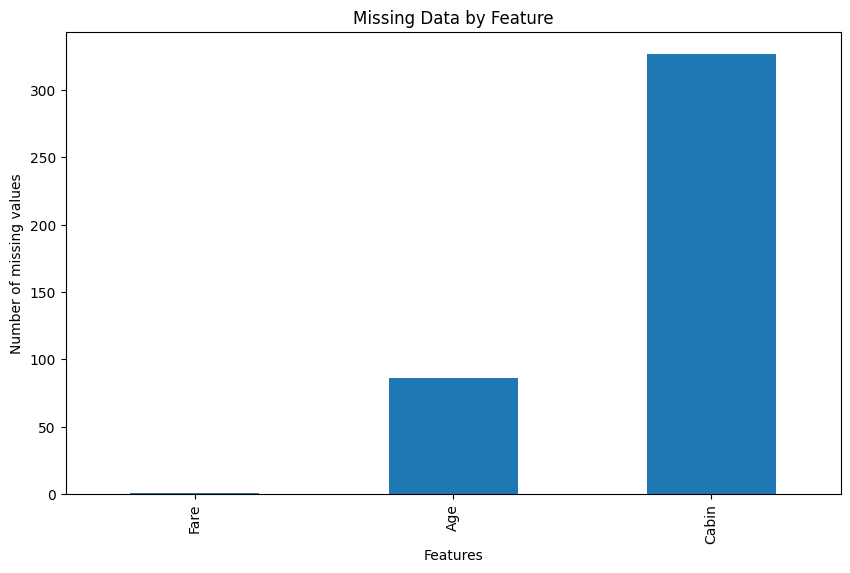

In [16]:
missingdata(test_df)

In [17]:
test_df['Age'].mean()

30.272590361445783

In [19]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

In [20]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [21]:
drop_column = ['Cabin']
train_df.drop(drop_column, axis=1, inplace = True)
test_df.drop(drop_column,axis=1,inplace=True)

In [22]:
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [23]:
print('check the nan value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('check the nan value in test data')
print(test_df.isnull().sum())

check the nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
check the nan value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [24]:
## combiner test et entraînement en un seul pour appliquer une fonction
all_data=[train_df,test_df]

In [25]:
# Créer une nouvelle fonctionnalité FamilySize en tant que combinaison de SibSp et Parch
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [27]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [28]:
for dataset in all_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

In [29]:
for dataset in all_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare',
                                                                                      'Average_fare','high_fare'])

In [30]:
traindf=train_df
testdf=test_df

In [31]:
all_dat=[traindf,testdf]

In [32]:
for dataset in all_dat:
    drop_column = ['Age','Fare','Name','Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

In [33]:
drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [34]:
testdf.head(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Elder,Low_fare


In [35]:
traindf = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [36]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [37]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
1,893,3,1,0,2,True,False,False,False,False,...,False,False,True,False,False,True,True,False,False,False
2,894,2,0,0,1,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,895,3,0,0,1,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,896,3,1,1,3,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


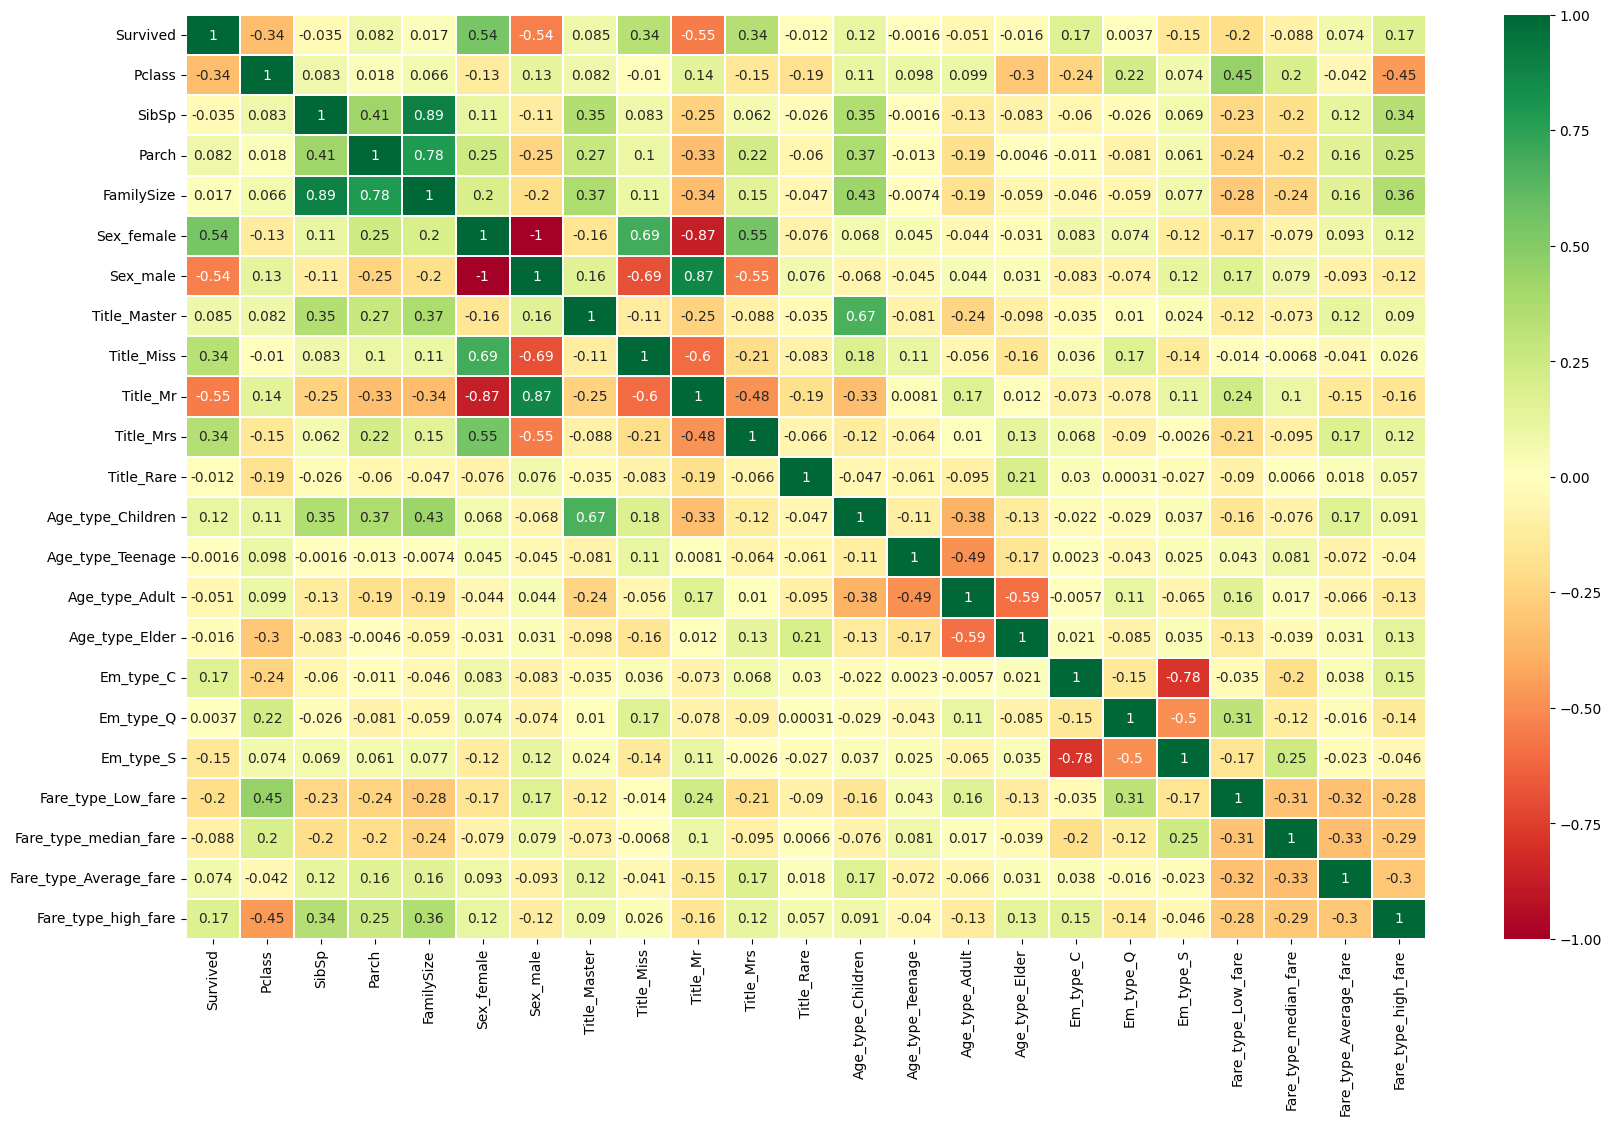

In [38]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

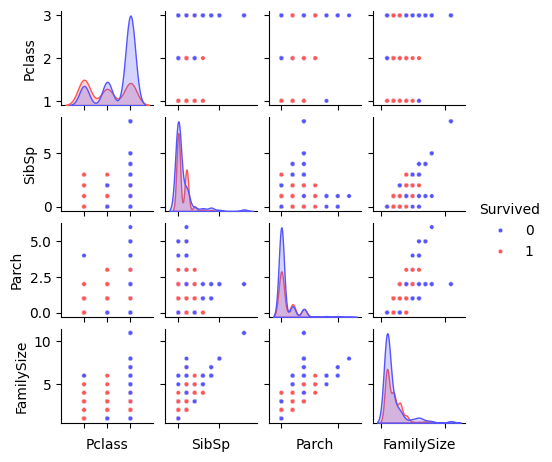

In [39]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [40]:
from sklearn.model_selection import train_test_split #for split the data
from sklearn.metrics import accuracy_score  #for accuracy_score
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 22), (268, 22), (623,), (268,))

--------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.46
The cross validated score for Logistic REgression is: 81.93


Text(0.5, 1.05, 'Confusion_matrix')

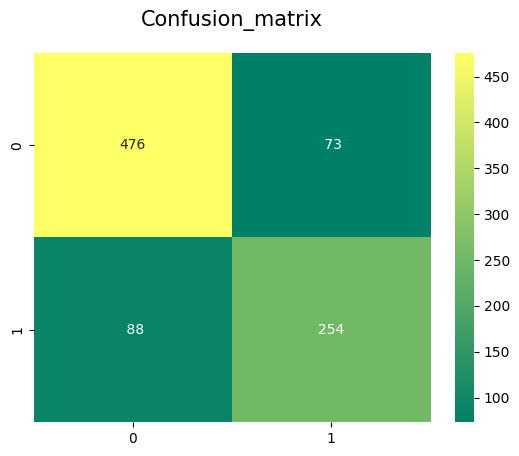

In [43]:
from sklearn.linear_model import LogisticRegression # Logistic Regression

model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Logistic REgression is:',round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 82.46
The cross validated score for Random Forest Classifier is: 83.73


Text(0.5, 1.05, 'Confusion_matrix')

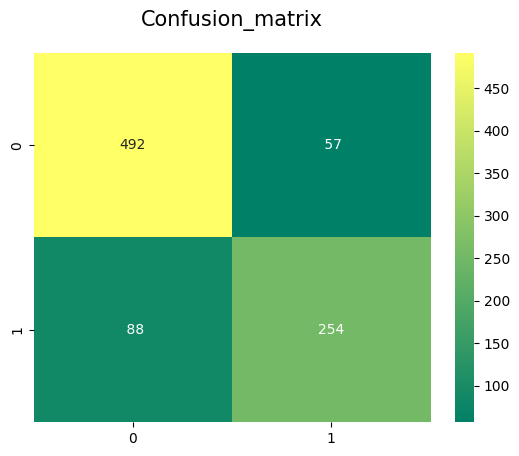

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 83.58
The cross validated score for Support Vector Machines Classifier is: 83.16


Text(0.5, 1.05, 'Confusion_matrix')

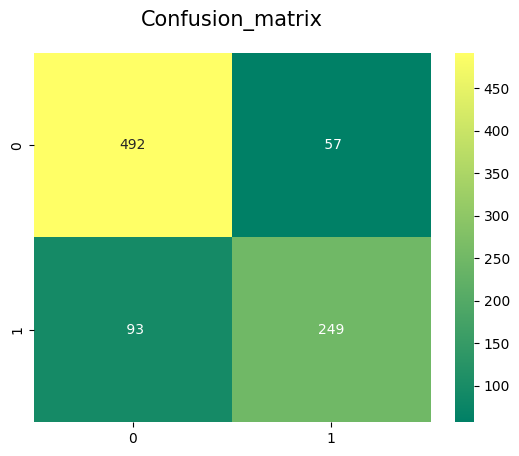

In [46]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train,y_train)
prediction_svm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Machines Classifier is',round(accuracy_score(prediction_svm,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_svm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Machines Classifier is:',round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 79.48
The cross validated score for K Nearest Neighbors Classifier is: 80.02


Text(0.5, 1.05, 'Confusion_matrix')

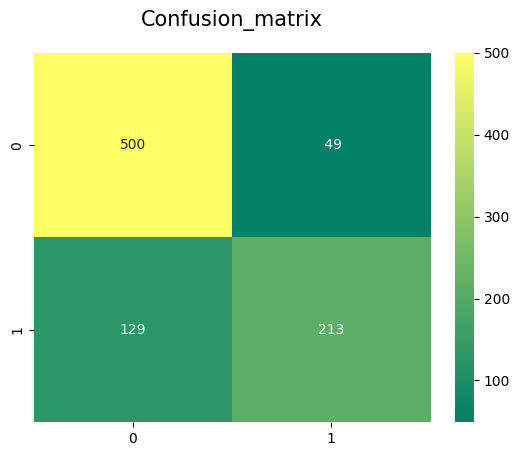

In [47]:
##knn
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 79.48
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

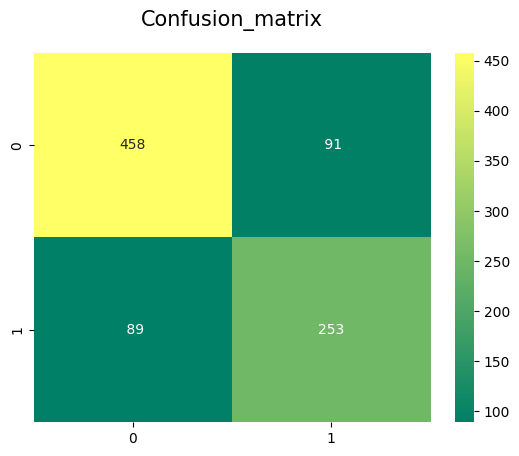

In [48]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gaussian Naive Bayes Classifier is',round(accuracy_score(prediction_gnb,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Gaussian Naive Bayes classifier is:',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 80.22
The cross validated score for Decision Tree classifier is: 81.71


Text(0.5, 1.05, 'Confusion_matrix')

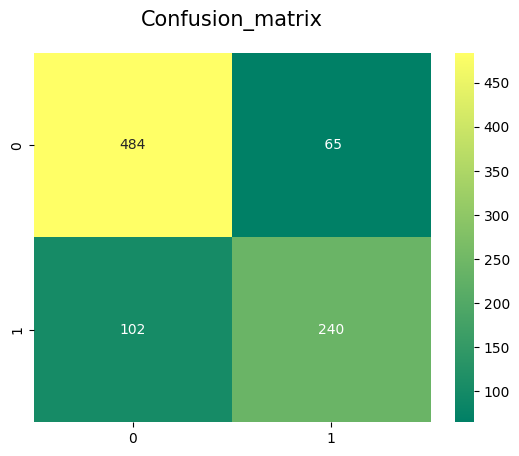

In [49]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini',
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the DecisionTree Classifier is',round(accuracy_score(prediction_tree,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_tree=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree classifier is:',round(result_tree.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 80.22
The cross validated score for AdaBoostClassifier is: 81.03


Text(0.5, 1.05, 'Confusion_matrix')

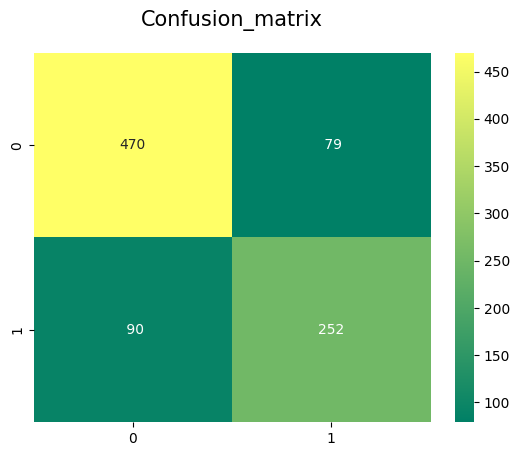

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the AdaBoostClassifier is',round(accuracy_score(prediction_adb,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 82.84
The cross validated score for AdaBoostClassifier is: 82.38


Text(0.5, 1.05, 'Confusion_matrix')

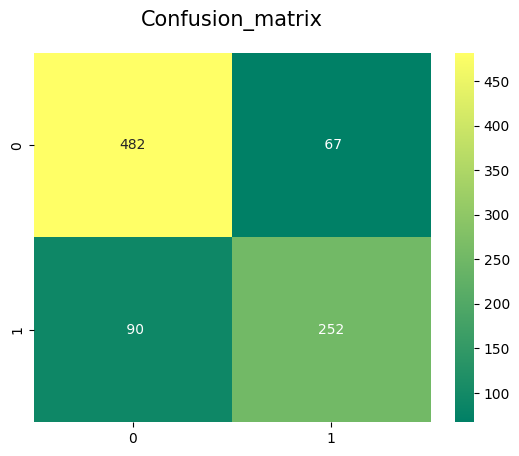

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the LinearDiscriminantAnalysis is',round(accuracy_score(prediction_lda,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 82.46
The cross validated score for AdaBoostClassifier is: 82.05


Text(0.5, 1.05, 'Confusion_matrix')

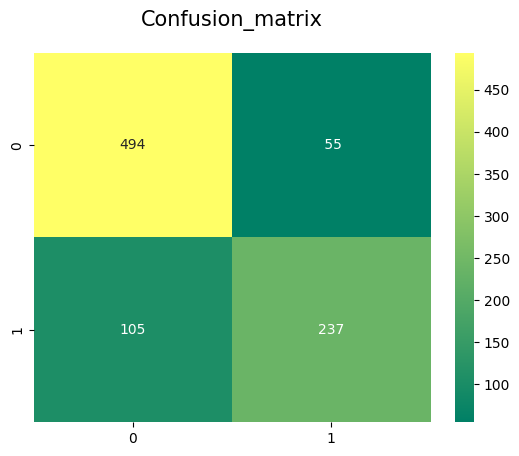

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [53]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier',
              'Gradient Decent', 'Linear Discriminant Analysis',
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(),
              result_rm.mean(), result_gnb.mean(), result_adb.mean(),
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Random Forest,0.837303
0,Support Vector Machines,0.831648
7,Linear Discriminant Analysis,0.823820
6,Gradient Decent,0.820474
2,Logistic Regression,0.819301
8,Decision Tree,0.817079
5,AdaBoostClassifier,0.810325
1,KNN,0.800225
4,Naive Bayes,0.798002


In [54]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X  = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 22), (891,), (418, 22))

In [55]:
# Gradient boosting tunning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1]
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

modelf.fit(train_X,train_Y)

# Best score
modelf.best_score_

# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


GradientBoostingClassifier(learning_rate=0.05, loss='deviance', max_depth=8,
                           max_features=0.3, min_samples_leaf=100,
                           n_estimators=200)

In [56]:
modelf.best_score_

0.81374531835206

In [57]:
# Random Forest Classifier Parameters tunning
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8204569706860838


RandomForestClassifier(n_estimators=800)

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best score
print(modell.best_score_)

# Best Estimator
modell.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8215491808423827


LinearDiscriminantAnalysis(tol=0.001)

In [59]:
model= SVC()
param_grid = {'kernel': ['rbf','linear'],
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(train_X,train_Y)

print(modelsvm.best_estimator_)

# Best score
print(modelsvm.best_score_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
SVC(C=50, gamma=0.01)
0.8338710689849979


The accuracy of the Random Forest model is 79.1


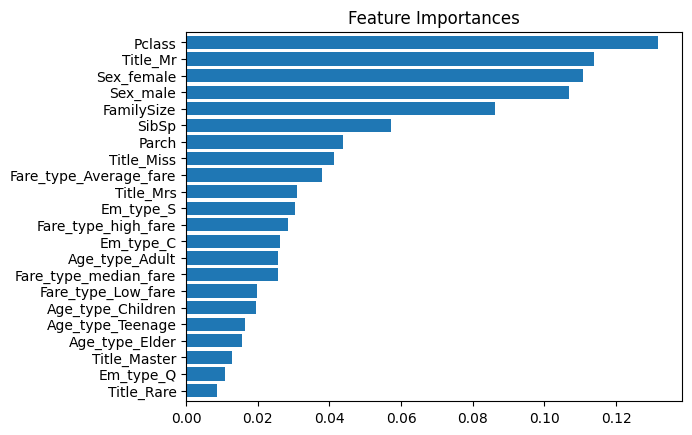

____________________________________________________________
0.7910447761194029


In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',  # 'auto' is deprecated, use 'sqrt'
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    n_estimators=100,
    random_state=22
)

# Fit the model
random_forest.fit(X_train, y_train)

# Make predictions
predictions = random_forest.predict(X_test)

# Calculate accuracy
acc_random_forest = accuracy_score(y_test, predictions)
print('The accuracy of the Random Forest model is', round(acc_random_forest * 100, 2))

# Plot feature importances
pd.Series(random_forest.feature_importances_, X_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importances')
plt.show()

print('__'*30)
print(acc_random_forest)


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Example preprocessing steps for both training and test data
def preprocess_data(df):
    # Example: Encoding categorical variables
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Title', 'Age_bin', 'Fare_bin'], drop_first=True)

    # Example: Filling missing values
    df.fillna(df.mean(), inplace=True)

    return df

print("Train DataFrame columns:", train_df.columns)
print("Test DataFrame columns:", test_df.columns)

# Apply preprocessing to training data
X_train = preprocess_data(train_df.drop(columns=['Survived']))
y_train = train_df['Survived']

# Apply the same preprocessing to the test data
test_features = preprocess_data(test_df.drop(columns=['PassengerId']))

# Ensure columns match between training and test data
missing_cols = set(X_train.columns) - set(test_features.columns)
for col in missing_cols:
    test_features[col] = 0
test_features = test_features[X_train.columns]

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(
    bootstrap=True,
    class_weight=None,
    criterion='gini',
    max_depth=None,
    max_features='sqrt',  # 'auto' is deprecated, use 'sqrt'
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    n_estimators=100,
    random_state=22
)

# Fit the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
Y_pred_submission = random_forest.predict(test_features)

# Create submission DataFrame
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": Y_pred_submission
})

# Save the submission DataFrame to a CSV file
submission.to_csv('gender_submission.csv', index=False)

print('__'*30)




Train DataFrame columns: Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'FamilySize',
       'Title', 'Age_bin', 'Fare_bin'],
      dtype='object')
Test DataFrame columns: Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked',
       'FamilySize', 'Title', 'Age_bin', 'Fare_bin'],
      dtype='object')
____________________________________________________________


In [74]:
submission.to_csv('gender_submission.csv', index=False)

In [75]:
from google.colab import files
submission.to_csv('gender_submission.csv', index = False)
files.download('gender_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>